#Capstone project: Battle of the neighborhoods
#Recommendation of the neighbourhood in Toronto to open a Spanish restaurant.

##Introduction
As a Spanish living in Toronto, I am studying the possibility to open a Spanish restaurant in Toronto where people could enjoy well elaborated food. As I need as many people as possible to come to the restaurant, choosing the right location is crucial to the business. 

##Data source
The project will make use of the following data sources:

Postal codes of different neighbourhoods in Canada will be retrieved from this website  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
Location coordinates of different neighborhoods will be retrieved from this site: https://cocl.us/Geospatial_data

Finally, I will use the FourSquare API to explore different neighborhoods in Toronto. The Foursquare explore function will be used to get the most popular venues in each neighborhood.

##Methodology

The postal codes of different neighborhoods in Toronto will be collected by Web scraping (HTTP request).
Data will be cleaned and selected by Beautiful Soup library. 
After that, the geographical coordinates, latitude, and longitude will be retrieved by using the Google API. 
The neighborhood with name, postal code, geographical coordinates will be regrouped and cleaned by Pandas library. 
Then FourSquare API will be called to retrieve all the venues in different neighborhoods. 




First of all, we need to import all necessary python libraries

In [1]:
#Installing and Importing the required Libraries

!pip install beautifulsoup4
!pip install lxml
!pip install geopy
!pip install folium
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


##Scraping the Wikipedia page for the table of postal codes of Canada

In [2]:
#Scraping the Wikipedia page for the table of postal codes of Canada
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


##The html table is converted to Pandas DataFrame for cleaning and preprocessing

In [3]:
#The html table is converted to Pandas DataFrame for cleaning and preprocessing.
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


##Data preprocessing and cleaning

In [4]:
#Data preprocessing and cleaning
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [5]:
# Shape of data frame
df2.shape

(103, 3)

##Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [6]:
#Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
#Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada
print(lat_lon.head()) 


df2.rename(columns={'Postal Code': 'Postcode'}, inplace=True)
print(df2.head())

#Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada
lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)
df3 = pd.merge(df2,lat_lon,on='Postcode')
df3.head()


  Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476
  Postcode           Borough                                Neighbourhood
0      M3A        North York                                    Parkwoods
1      M4A        North York                             Victoria Village
2      M5A  Downtown Toronto                    Regent Park, Harbourfront
3      M6A        North York             Lawrence Manor, Lawrence Heights
4      M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government


,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [8]:
#Getting all the rows from the data frame which contains Toronto in their Borough.
df4 = df3[df3['Borough'].str.contains('Toronto',regex=False)]
df4

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


##Visualizing all the Neighbourhoods of the above data frame using Folium

In [9]:
#Visualizing all the Neighbourhoods of the above data frame using Folium
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(df4['Latitude'],df4['Longitude'],df4['Borough'],df4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

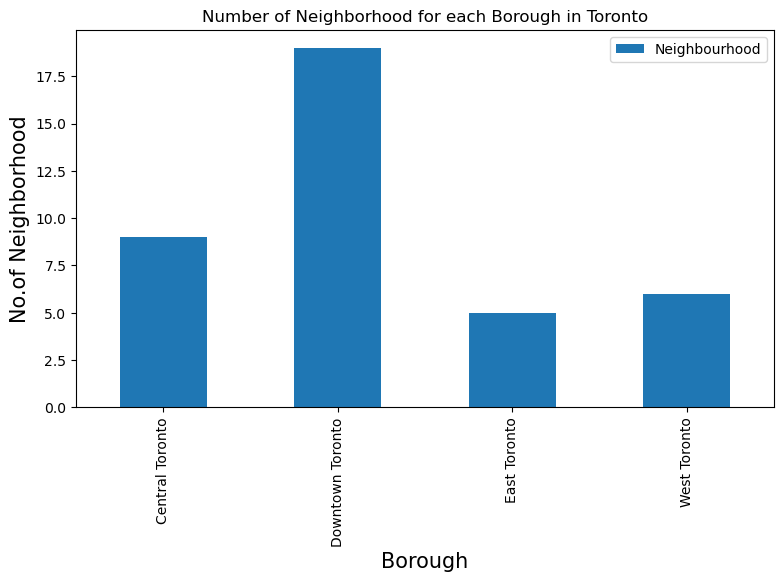

In [10]:
#Number of boroughs in each neighborhood
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
df4.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that Downtown Toronto has highest number of neighborhoods

##Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'QIP3OKGUN0ZG01ISNDZHNZQ5S2L1TJYI1DVTUNU5PWYUK4BT' # your Foursquare ID
CLIENT_SECRET = 'KM423IZJJLK1FZIAGK1VSK41NFHRURUMOKRRVDQOZ4SUSEU5' # your Foursquare Secret
VERSION = '20200614' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: QIP3OKGUN0ZG01ISNDZHNZQ5S2L1TJYI1DVTUNU5PWYUK4BT
CLIENT_SECRET:KM423IZJJLK1FZIAGK1VSK41NFHRURUMOKRRVDQOZ4SUSEU5


##Explore Neighborhoods in Toronto

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 100000 # define radius to 1000m

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
#Run the above function on each neighborhood and create a new dataframe
Toronto_data = df4
Toronto_venues = getNearbyVenues(names=Toronto_data['Borough'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
East Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
West Toronto
Downtown Toronto
West Toronto
East Toronto
Downtown Toronto
West Toronto
East Toronto
Downtown Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
West Toronto
Central Toronto
Central Toronto
West Toronto
Central Toronto
Downtown Toronto
West Toronto
Central Toronto
Downtown Toronto
Central Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
East Toronto


In [14]:
#The size of the resulting dataframe
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Central Toronto,561,561,561,561,561,561
Downtown Toronto,1670,1670,1670,1670,1670,1670
East Toronto,409,409,409,409,409,409
West Toronto,540,540,540,540,540,540


In [15]:
#Find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 276 uniques categories.


In [16]:
#The name list of all Venue Categories
Toronto_venues['Venue Category'].unique()


array(['Bakery', 'Coffee Shop', 'Restaurant', 'Historic Site',
       'Distribution Center', 'Farmers Market', 'Chocolate Shop',
       'Breakfast Spot', 'Park', 'Mediterranean Restaurant',
       'Dessert Shop', 'Spa', 'Performing Arts Venue', 'Liquor Store',
       'French Restaurant', 'Tech Startup', 'Italian Restaurant', 'Café',
       'Pub', 'Gym / Fitness Center', 'Thai Restaurant', 'Pool',
       'Animal Shelter', 'Yoga Studio', 'Shoe Store', 'Theater',
       'Event Space', 'Gastropub', 'Furniture / Home Store', 'Brewery',
       'Diner', 'Art Gallery', 'German Restaurant', 'Karaoke Bar',
       'Sandwich Place', 'Cosmetics Shop', 'Grocery Store',
       'Asian Restaurant', 'Middle Eastern Restaurant', 'Food Truck',
       'Gym Pool', 'Athletics & Sports', 'Pizza Place',
       'Sushi Restaurant', 'Dance Studio', 'Electronics Store',
       'Beer Store', 'Pet Store', 'Indian Restaurant', 'Bank',
       'Auto Dealership', 'Museum', 'Pakistani Restaurant',
       'Skating Rink', 

In [17]:
#Analyze Each Neighborhood
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,...,Tree,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Zoo,Accessories Store,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,...,Tree,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,Central Toronto,0.000000,0.000000,0.000000,0.000000,0.005348,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014260,0.001783,0.001783,0.008913,0.000000,0.007130,0.010695
1,Downtown Toronto,0.000000,0.000000,0.000599,0.000599,0.011377,0.000000,0.000599,0.000000,0.001796,...,0.000000,0.000000,0.001796,0.016168,0.000000,0.000000,0.002994,0.000000,0.001198,0.008383
2,East Toronto,0.000000,0.000000,0.000000,0.000000,0.017115,0.000000,0.000000,0.002445,0.000000,...,0.002445,0.002445,0.000000,0.007335,0.000000,0.000000,0.009780,0.000000,0.000000,0.009780
3,West Toronto,0.001852,0.001852,0.000000,0.000000,0.009259,0.003704,0.000000,0.003704,0.000000,...,0.000000,0.000000,0.000000,0.012963,0.000000,0.000000,0.009259,0.001852,0.003704,0.003704


In [19]:
#Let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [20]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Toronto,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Restaurant
1,Downtown Toronto,Coffee Shop,Café,Park,Hotel,Restaurant
2,East Toronto,Coffee Shop,Greek Restaurant,Bakery,Pub,Café
3,West Toronto,Café,Coffee Shop,Bar,Restaurant,Bakery


#Discussion and conclusion

Based on Four Square API search result, we can see that coffee shops and restaurants venue categories are the most common venues in the different neighbourhoods. Which means that people usually eat out. Among all the venues there is none Spanish restaurant listed and it is known that more than 70,000 people living in Toronto list Spanish as their Mother Tongue.

Among of all neighbourhoods, Downtown Toronto is the city with more boroughs and probably the most populated city, thus, is probably the best neighbourhood to open a restaurant. 
This result of this analysis has some limitations. It cannot reflect the behaviour of the customer in that area. People like to visit the restaurants or stop by the coffee shops does not mean they want Spanish food. The customers may enjoy the fact of trying new dishes, more than just having the typical Chinese or Canadian food. 
Rental cost has not been taken into account either. Downtown Toronto may be the most expensive rental area in Toronto.
